# Import packages and Settings

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data

In [2]:
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

In [3]:
columns_missing = train_data.columns[train_data.isna().any()].tolist()
columns_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
total = train_data[columns_missing].isnull().sum().sort_values(ascending=False)
percent = (train_data[columns_missing].isnull().sum()/train_data.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
feature = 'Street'
train_data[feature] = train_data[feature].map({'Pave': 0, 'Grvl':1})
test_data[feature] = test_data[feature].map({'Pave': 0, 'Grvl':1})

assert(is_numeric_dtype(train_data[feature]))

feature = 'Alley'
train_data[feature] = train_data[feature].fillna('None')
test_data[feature] = test_data[feature].fillna('None')

assert(train_data[feature].isna().sum() == 0)

feature = 'MasVnrType'
train_data[feature] = train_data[feature].fillna('None')
test_data[feature] = test_data[feature].fillna('None')

assert(train_data[feature].isna().sum() == 0)

feature = 'MasVnrArea'
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(train_data[feature].isna().sum() == 0)

quality_map = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

feature = 'ExterQual'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)

assert(is_numeric_dtype(train_data[feature]))

feature = 'ExterCond'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)

assert(is_numeric_dtype(train_data[feature]))

feature = 'BsmtQual'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'BsmtCond'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

exposure_map = {'No':1, 'Mn':2, 'Av':3, 'Gd':4}

feature = 'BsmtExposure'
train_data[feature] = train_data[feature].map(exposure_map)
test_data[feature] = test_data[feature].map(exposure_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

type_map = {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

feature = 'BsmtFinType1'
train_data[feature] = train_data[feature].map(type_map)
test_data[feature] = test_data[feature].map(type_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'BsmtFinType2'
train_data[feature] = train_data[feature].map(type_map)
test_data[feature] = test_data[feature].map(type_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'HeatingQC'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)

assert(is_numeric_dtype(train_data[feature]))

feature = 'CentralAir'
train_data[feature] = train_data[feature].map({'N': 0, 'Y':1})
test_data[feature] = test_data[feature].map({'N': 0, 'Y':1})

assert(is_numeric_dtype(train_data[feature]))

feature = 'KitchenQual'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)

assert(is_numeric_dtype(train_data[feature]))

function_map = {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}

feature = 'Functional'
train_data[feature] = train_data[feature].map(function_map)
test_data[feature] = test_data[feature].map(function_map)

assert(is_numeric_dtype(train_data[feature]))

feature = 'FireplaceQu'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'GarageType'
train_data[feature] = train_data[feature].fillna('None')
test_data[feature] = test_data[feature].fillna('None')

assert(train_data[feature].isna().sum() == 0)

feature = 'GarageYrBlt'
train_data[feature] = train_data[feature].fillna(-1)
test_data[feature] = test_data[feature].fillna(-1)

assert(train_data[feature].isna().sum() == 0)

exposure_map = {'Unf':1, 'RFn':2, 'Fin':3}

feature = 'GarageFinish'
train_data[feature] = train_data[feature].map(exposure_map)
test_data[feature] = test_data[feature].map(exposure_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'GarageQual'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'GarageCond'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'PoolQC'
train_data[feature] = train_data[feature].map(quality_map)
test_data[feature] = test_data[feature].map(quality_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

fence_map = {'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}

feature = 'Fence'
train_data[feature] = train_data[feature].map(fence_map)
test_data[feature] = test_data[feature].map(fence_map)
train_data[feature] = train_data[feature].fillna(0)
test_data[feature] = test_data[feature].fillna(0)

assert(is_numeric_dtype(train_data[feature]))
assert(train_data[feature].isna().sum() == 0)

feature = 'MiscFeature'
train_data[feature] = train_data[feature].fillna('None')
test_data[feature] = test_data[feature].fillna('None')

assert(train_data[feature].isna().sum() == 0)

In [6]:
columns_missing = train_data.columns[train_data.isna().any()].tolist()
columns_missing

['LotFrontage', 'Electrical']

# Analysis

## Heatmap

### Overall

<Axes: >

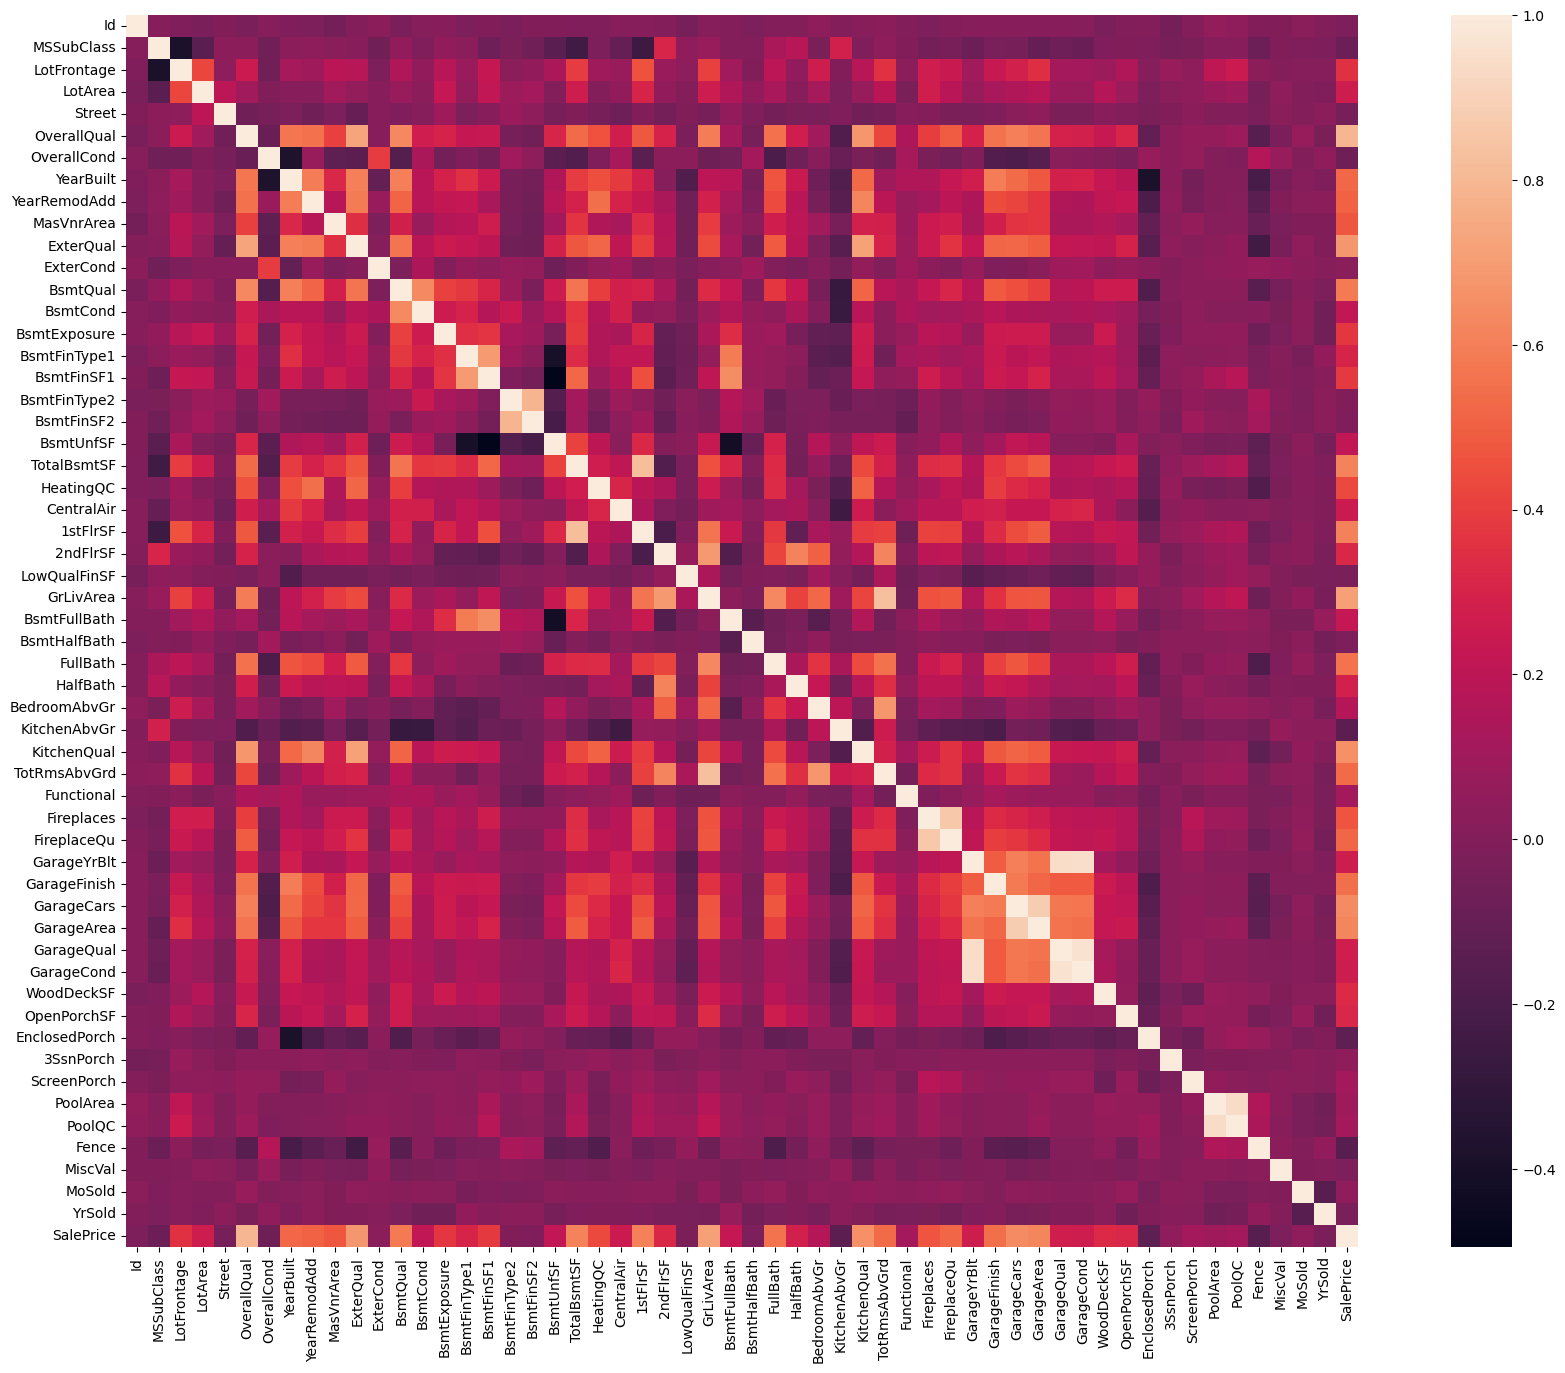

In [7]:
corr = train_data.select_dtypes(exclude='O').corr()
f, ax = plt.subplots(figsize=(24, 16))
sns.heatmap(corr, square=True)

### Top 10 with SalePrice

<Axes: >

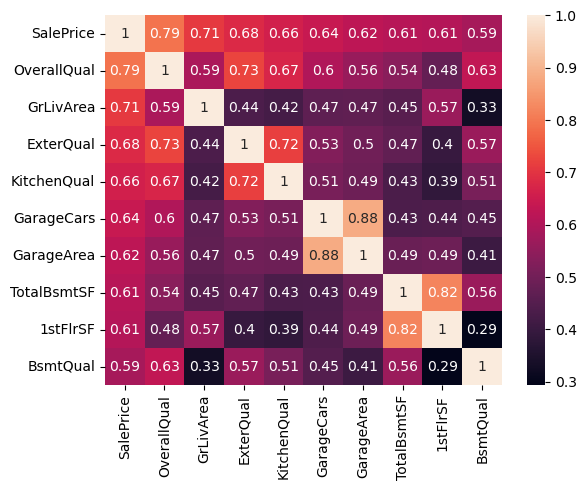

In [8]:
cols_10 = corr.nlargest(10, 'SalePrice')['SalePrice'].index
corr_10 = train_data[cols_10].corr()
sns.heatmap(corr_10, annot=True)

## SalePrice

In [9]:
corr['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
GarageYrBlt      0.261354
CentralAir       0.251328
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
Fence            0.146942
KitchenAbvGr     0.135907
EnclosedPorc

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

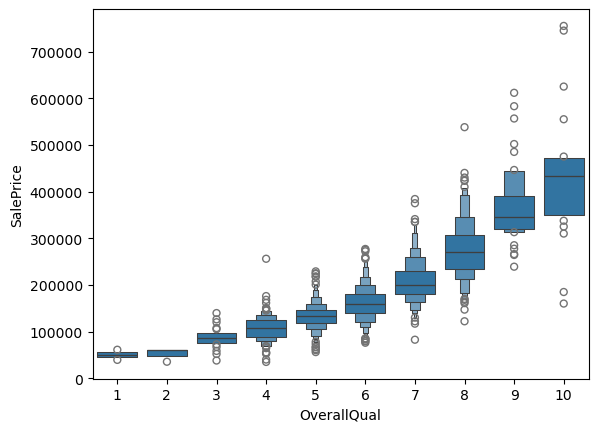

In [8]:
sns.boxenplot(train_data, x='OverallQual', y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

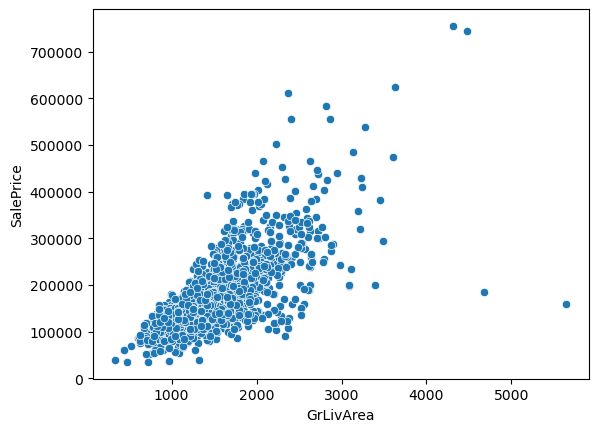

In [10]:
sns.scatterplot(train_data, x='GrLivArea', y='SalePrice')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

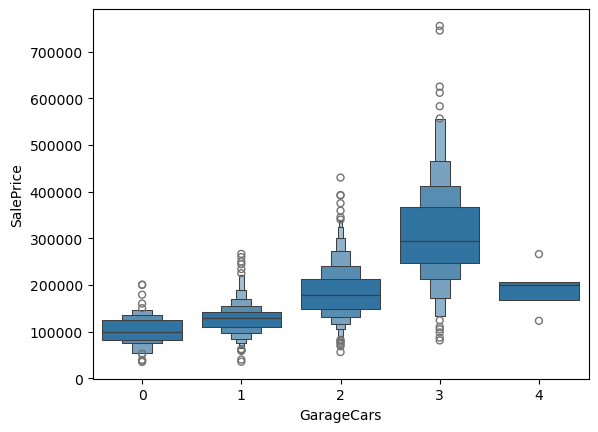

In [11]:
sns.boxenplot(train_data, x='GarageCars', y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

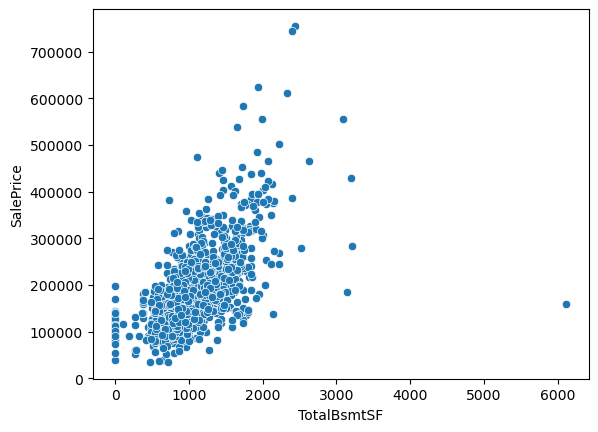

In [13]:
sns.scatterplot(train_data, x='TotalBsmtSF', y='SalePrice')

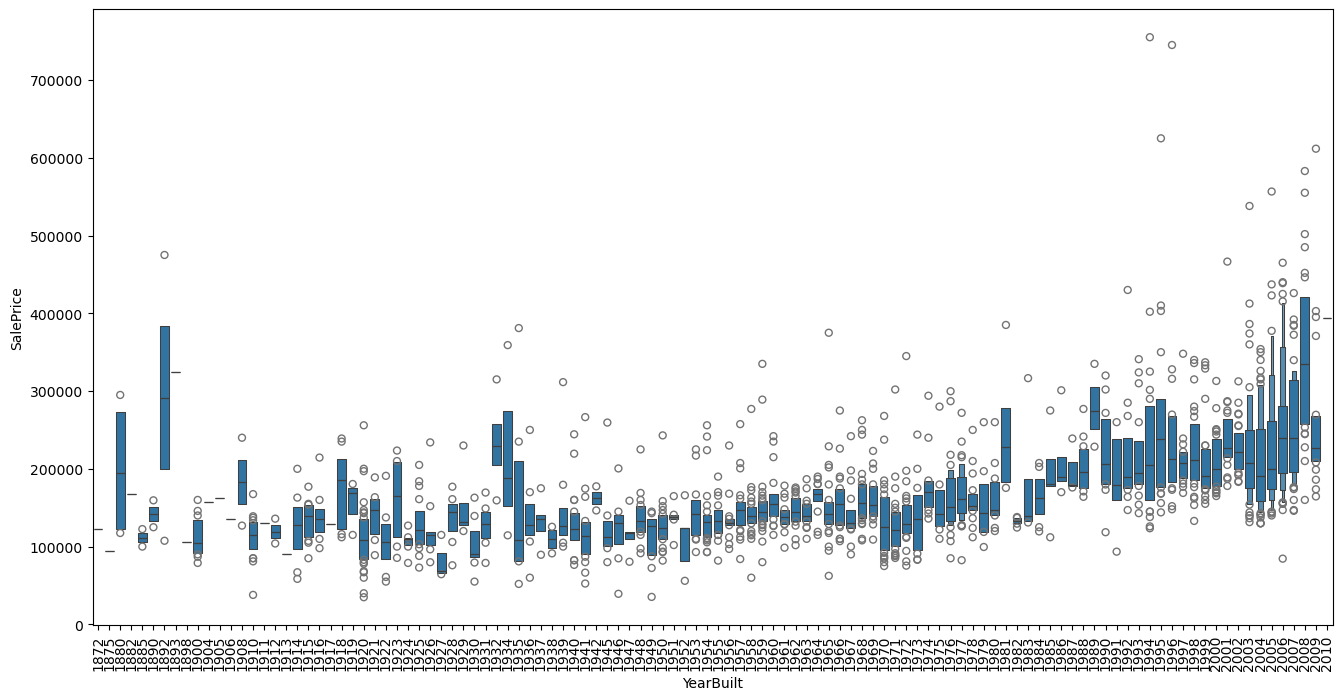

In [22]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxenplot(train_data, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

## GarageX

<Axes: >

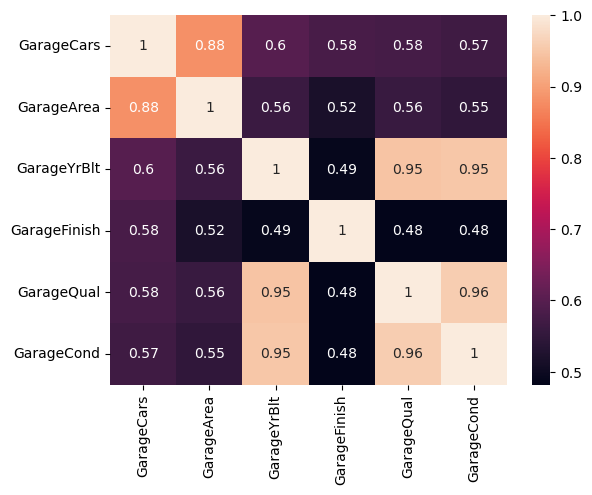

In [12]:
corr_garage = train_data[['GarageCars', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].corr()
sns.heatmap(corr_garage, annot=True)

## BsmtX

<Axes: >

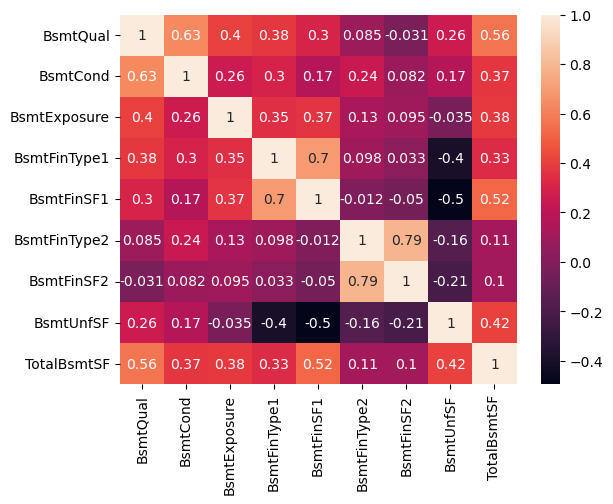

In [13]:
corr_garage = train_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].corr()
sns.heatmap(corr_garage, annot=True)

## OverallQual

In [10]:
corr['OverallQual'].abs().sort_values(ascending=False)

OverallQual      1.000000
SalePrice        0.790982
ExterQual        0.726278
KitchenQual      0.673331
BsmtQual         0.629379
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
GarageFinish     0.556863
YearRemodAdd     0.550684
FullBath         0.550600
TotalBsmtSF      0.537808
FireplaceQu      0.490788
1stFlrSF         0.476224
HeatingQC        0.457083
TotRmsAbvGrd     0.427452
MasVnrArea       0.407252
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
BsmtExposure     0.296517
2ndFlrSF         0.295493
GarageQual       0.292399
GarageYrBlt      0.288984
GarageCond       0.286955
HalfBath         0.273458
CentralAir       0.272038
BsmtCond         0.268759
LotFrontage      0.251646
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
BsmtFinType1     0.232503
KitchenAbvGr     0.183882
Fence            0.152253
Functional       0.145436
EnclosedPorch    0.113937
BsmtFullBath     0.111098
LotArea     